In [1]:
from Project4.verification_net import VerificationNet
from Project4.stacked_mnist import StackedMNISTData, DataMode
from gen_autoencoder_routine import Generative_AE_Routine
import torch

In [3]:
""" ANOMALY DETECTOR AUTOENCODER ROUTINE"""
torch.manual_seed(0)

batch_size = 16
data_object = StackedMNISTData(mode=DataMode.MONO_FLOAT_MISSING, default_batch_size=batch_size)
#instantiate verification network
net = VerificationNet(force_learn=False)
net.train(generator=data_object, epochs=5) # gen=data_object, makes sure we test on the same type of data as the model was trained on
verification_tolerance = 0.8 if data_object.channels == 1 else 0.5

autoencoder_learning_rate = 0.0002
autoencoder_loss_function = 'MSE' #'binary_cross_entropy'  # AVAILABLE 'binary_cross_entropy'
autoencoder_optimizer = 'adam'#'SGD'#  # AVAILABLE 'SGD' # #
autoencoder_epochs = 1  # Optimal for MNIST: 3

num_samples = 200
latent_vector_size = 64  # recommended for MNIST between 16 and 64""" ANOMALY DETECTOR AUTOENCODER ROUTINE"""

number_anom_images_to_show = 16
anom_name = 'Test_anom_AE'
anom_ae_save_path = f'checkpoints/anom_AE/{anom_name}/'
anom_autoencoder = Generative_AE_Routine(
    data_object,
    autoencoder_learning_rate,
    autoencoder_loss_function,
    autoencoder_optimizer,
    autoencoder_epochs,
    
    latent_vector_size,
    batch_size,
    num_samples,
    anom_ae_save_path
)




Autoencoder(
  (encoder): Encoder(
    (model): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
      (7): Linear(in_features=512, out_features=64, bias=True)
    )
  )
  (decoder): Decoder(
    (model): Sequential(
      (0): Linear(in_features=64, out_features=512, bias=True)
      (1): Unflatten(dim=1, unflattened_size=(32, 4, 4))
      (2): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), 


GENERATIVE AUTOENCODER TRAINING

Epoch: 0, Iteration: 1692, Validation loss: 1.3655, Validation accuracy N/A
Epoch: 0, Iteration: 3384, Validation loss: 1.3655, Validation accuracy N/A


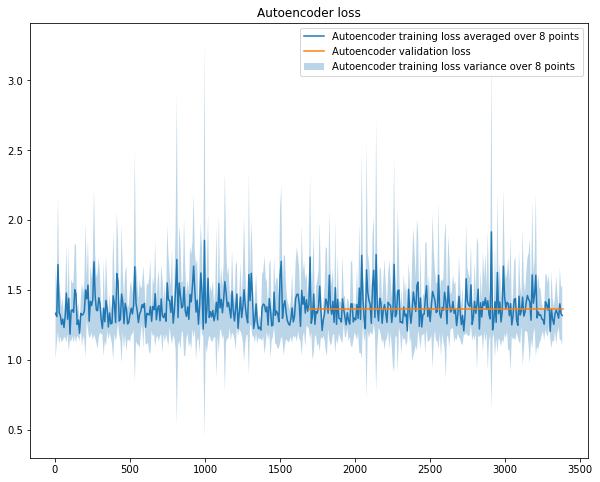

In [4]:
"""OPTIONAL TRAINING"""
anom_autoencoder.train_autoencoder()

Loaded model from checkpoints/anom_AE/Test_anom_AE
Anomaly loss values: [5.5309496, 5.325143, 5.3220315, 5.1357493, 5.054936, 5.0485606, 4.7671037, 4.723377, 4.61381, 4.550727, 4.5149183, 4.473221, 4.4648438, 4.428114, 4.4065595, 4.3929644]


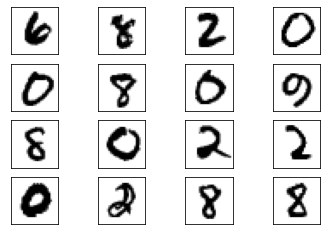

In [6]:
"""TESTING WITH SPECIFIED MODEL"""
model_name = 'Test_anom_AE'
test_model_path = f'checkpoints/anom_AE/{model_name}'

anom_autoencoder.anomaly_detection(number_anom_images_to_show, load_model_path=test_model_path)
